<a href="https://colab.research.google.com/github/ymuto0302/SampleCode/blob/main/huggingface_OSS_VQA_salesforce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hugging Face で公開されている Salesforce/blip-vqa-base を利用したVQAシステム
2025.05.27

claude が生成したコードから Salesforce/blip-vqa-base というモデルを知ったから，これを試してみた。

(claude) Salesforce/blip-vqa-base とはどのようなモデルですか？

Salesforce/blip-vqa-baseは、SalesforceのBLIP（Bootstrapping Language-Image Pre-training）シリーズの一つで、Visual Question Answering（VQA）タスクに特化したマルチモーダルAIモデルです。

**主な特徴：**

**アーキテクチャ**：画像とテキストの両方を理解できるトランスフォーマーベースのモデルで、画像エンコーダー（通常はViT：Vision Transformer）とテキストエンコーダー・デコーダーを組み合わせています。

**機能**：画像を見て、その画像に関する質問に自然言語で答えることができます。例えば、犬の写真を見せて「この動物は何色ですか？」と質問すると、「茶色です」のような回答を生成します。

**学習手法**：BLIPの特徴的な「ブートストラップ」手法を使用しており、ノイズの多いウェブデータから高品質な画像-テキストペアを自動的に生成・フィルタリングして学習に活用しています。

**用途**：
- 画像に関する質問応答
- 画像の内容理解・説明
- マルチモーダルな対話システム
- 視覚的推論タスク

**「base」**という名前が示すように、これは基本サイズのモデルで、より大きなバリエーション（largeなど）も存在します。Hugging Face Hub上で公開されており、研究・開発目的で広く利用されています。

## モジュールのインポート

In [4]:
# Import BlipForQuestionAnswering for question-answering model from the transformers library
from transformers import BlipForQuestionAnswering

# Import AutoProcessor for pre-processing images and text inputs
from transformers import AutoProcessor

# Import the Image module from the PIL library for image manipulation
from PIL import Image
import requests

## 事前学習済みモデルの読み込み

In [2]:
# Load the pre-trained BlipForQuestionAnswering model
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

In [3]:

# Load the pre-trained AutoProcessor for image and text processing
processor = AutoProcessor.from_pretrained("Salesforce/blip-vqa-base")

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

## 画像の読み込み

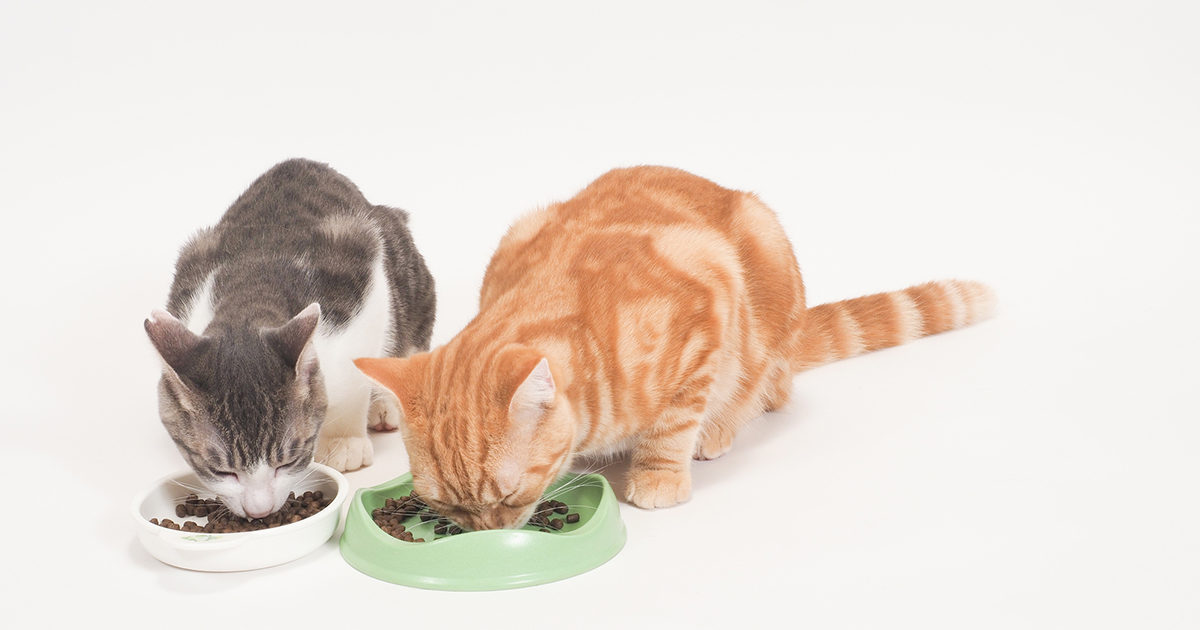

In [10]:
# Open the image
url = "https://www.aixia.jp/images//2021/09/vol-09-hero.jpg"
image = Image.open(requests.get(url, stream=True).raw)
#image.show() # Colab では動かない

from IPython.display import display
display(image)

## 質問とその回答(その1)

In [6]:
# Define the question to be asked about the image
question = "how many cats are in the picture?"

# Process the image and question, returning them as PyTorch tensors
inputs = processor(image, question, return_tensors="pt")

# Generate the answer using the model based on the processed inputs
out = model.generate(**inputs)

# Decode the generated output to get a human-readable answer, skipping special tokens
print(processor.decode(out[0], skip_special_tokens=True))

two


## 質問とその回答(その2)

In [7]:
# Define the question to be asked about the image
question = "is the cat eating its food?"

# Process the image and question, returning them as PyTorch tensors
inputs = processor(image, question, return_tensors="pt")

# Generate the answer using the model based on the processed inputs
out = model.generate(**inputs)

# Decode the generated output to get a human-readable answer, skipping special tokens
print(processor.decode(out[0], skip_special_tokens=True))

yes


## 質問とその回答(その3)

In [8]:
# Define the question to be asked about the image
question = "what color are the two cats?"

# Process the image and question, returning them as PyTorch tensors
inputs = processor(image, question, return_tensors="pt")

# Generate the answer using the model based on the processed inputs
out = model.generate(**inputs)

# Decode the generated output to get a human-readable answer, skipping special tokens
print(processor.decode(out[0], skip_special_tokens=True))

orange and white


## 質問とその回答(その4)

In [12]:
# Define the question to be asked about the image
question = "what do the two cats do?"

# Process the image and question, returning them as PyTorch tensors
inputs = processor(image, question, return_tensors="pt")

# Generate the answer using the model based on the processed inputs
out = model.generate(**inputs)

# Decode the generated output to get a human-readable answer, skipping special tokens
print(processor.decode(out[0], skip_special_tokens=True))

eat


## 質問とその回答(日本語を試す)
さすがに意味のない回答が返される

In [11]:
# Define the question to be asked about the image
question = "2匹の猫の色は?"

# Process the image and question, returning them as PyTorch tensors
inputs = processor(image, question, return_tensors="pt")

# Generate the answer using the model based on the processed inputs
out = model.generate(**inputs)

# Decode the generated output to get a human-readable answer, skipping special tokens
print(processor.decode(out[0], skip_special_tokens=True))

2
